<a href="https://colab.research.google.com/github/Ahmethan96/Data_science/blob/main/vehicle_detection_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [153]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [154]:
import os
os.chdir('/content/drive/My Drive/Vehicle_detection')

In [155]:
!pwd

/content/drive/My Drive/Vehicle_detection


In [163]:
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
  zip_ref.extractall('train_data')

In [156]:
image_directory = "/content/drive/MyDrive/Vehicle_detection/train_data/images"
label_directory = "/content/drive/MyDrive/Vehicle_detection/labels.npy"
text_directory = ""

In [137]:
import os
import numpy as np
from PIL import Image

class CustomDataset:
    def __init__(self, image_dir, label_dir):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.image_filenames = os.listdir(image_dir)

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, index):
        image_filename = self.image_filenames[index]
        image_path = os.path.join(self.image_dir, image_filename)
        label_path = os.path.join(self.label_dir, image_filename.replace(".jpg", ".npy"))

        image = Image.open(image_path)
        labels = np.load(label_path)

        return image, labels

In [138]:
dataset = CustomDataset(image_dir= image_directory, label_dir= label_directory)

In [140]:
image, label = dataset[0]

NotADirectoryError: ignored

In [143]:
labels = np.load('labels.npy', allow_pickle=True)

In [164]:
filenames = os.listdir(image_directory)

In [165]:
image_paths = [os.path.join(image_directory, filename) for filename in filenames]

In [146]:
# Print the list of image file paths
print(image_paths)

['/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_0_2020-07-30_jpg.rf.7d947cc31b302b22a527ecd17d3af963.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_0_2020-07-30_jpg.rf.f2b27ff74487ea9a91b9dff189180e8d.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_1_2020-07-30_jpg.rf.98afddaacbc695f7aa772884c6b10194.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_10_2020-07-30_jpg.rf.2a8900eefee0bcd7edf59af176174fd1.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_10_2020-07-30_jpg.rf.6e921136063738ab31b44dc0f306d95a.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_10_2020-07-30_jpg.rf.fe2434e14027559d1e005dd4f63a3530.jpg', '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_100_2020-07-30_jpg.rf.420e2047f1190fd66

In [147]:
import cv2

# Assuming you have a list of image file paths

# Load images and associate labels
labeled_images = {}

for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = labels[i]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}


IndexError: ignored

In [167]:
# Check lengths
print("Number of labels:", len(labels))
print("Number of image paths:", len(image_paths))

Number of labels: 8218
Number of image paths: 8219


In [169]:
for i in range(len(image_paths)):
  if image_paths[i].endswith(".txt"):
    print(i)


5694


In [170]:
print(image_paths[5694])

/content/drive/MyDrive/Vehicle_detection/train_data/images/train.txt


In [173]:
image_paths.remove("/content/drive/MyDrive/Vehicle_detection/train_data/images/train.txt")

In [180]:
print("Number of labels:", len(labels))
print("Number of image paths:", len(image_paths))

Number of labels: 8218
Number of image paths: 8218


In [150]:
print(labels)

[array([[3.      , 0.509804, 0.411765, 0.107843, 0.245098],
        [2.      , 0.210784, 0.616422, 0.127451, 0.232843]], dtype=float32)
 array([[0.     , 0.50375, 0.405  , 0.0975 , 0.245  ],
        [1.     , 0.19   , 0.59875, 0.12   , 0.2325 ],
        [2.     , 0.62125, 0.61   , 0.0575 , 0.125  ]], dtype=float32)
 array([[3.      , 0.516169, 0.396766, 0.10199 , 0.246269],
        [2.      , 0.205224, 0.594527, 0.121891, 0.233831],
        [4.      , 0.631841, 0.597015, 0.059701, 0.124378]], dtype=float32)
 ...
 array([[2.      , 0.389423, 0.765625, 0.144231, 0.372596],
        [7.      , 0.411058, 0.209135, 0.0625  , 0.158654],
        [2.      , 0.388221, 0.762019, 0.146635, 0.365385],
        [2.      , 0.59375 , 0.758413, 0.177885, 0.367788]], dtype=float32)
 array([[2.      , 0.954327, 0.668269, 0.091346, 0.240385],
        [5.      , 0.390625, 0.143029, 0.09375 , 0.252404],
        [4.      , 0.691106, 0.560096, 0.079327, 0.230769]], dtype=float32)
 array([[2.      , 0.519231, 0

In [175]:
import cv2

# Assuming you have a list of image file paths

# Load images and associate labels
labeled_images = {}

for i, image_path in enumerate(image_paths):
    image = cv2.imread(image_path)
    label = labels[i]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}

In [375]:
# Example: Access and display a labeled image
sample_image_path = '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_1000_2020-07-30_jpg.rf.9a2ce6acd2c0ffd57ab44a13f084b950.jpg'
sample_data = labeled_images[sample_image_path]

image = sample_data['image']
label = sample_data['label']

In [376]:
image.shape

(416, 416, 3)

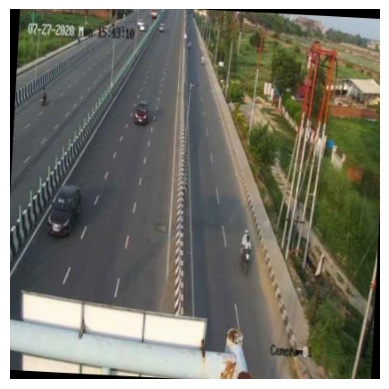

In [377]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [378]:
label

array([[3.      , 0.566106, 0.364183, 0.084135, 0.170673],
       [7.      , 0.158654, 0.268029, 0.091346, 0.137019],
       [2.      , 0.401442, 0.072115, 0.033654, 0.043269]], dtype=float32)

In [349]:
label[0]

array([3.      , 0.516169, 0.396766, 0.10199 , 0.246269], dtype=float32)

In [368]:
box_info = label[0]
class_label, x_min, y_min, x_max, y_max = box_info
x_min = x_min * 1000
y_min = y_min * 1000
x_max = x_max * 1000
y_max = y_max * 1000
color = (255, 255, 255)  # Green color
thickness = 2  # Thickness of the bounding box lines
# cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
# cv2.putText(image, f"Class {int(class_label)}", (int(x_min), int(y_min) - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

In [366]:
import cv2

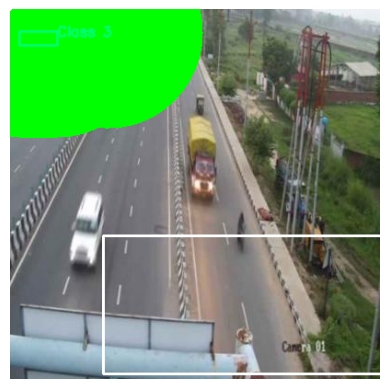

In [369]:
cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
cv2.putText(image, f"Class {int(class_label)}", (int(x_min), int(y_min) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [186]:
print(sample_data['label'])

[[3.       0.509804 0.411765 0.107843 0.245098]
 [2.       0.210784 0.616422 0.127451 0.232843]]


In [188]:
print(type(sample_data['label']))

<class 'numpy.ndarray'>


In [189]:
bounding_box = sample_data['label']  # Replace with actual bounding box coordinates

# Draw the bounding box on the image
x_min, y_min, x_max, y_max = bounding_box
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green rectangle

# Display the labeled image with bounding box using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

ValueError: ignored

In [278]:
image_path = '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'
image = cv2.imread(image_path)

# Sample label in the format: [[class, x_min, y_min, width, height], ...]
sample_label =  sample_data['label']

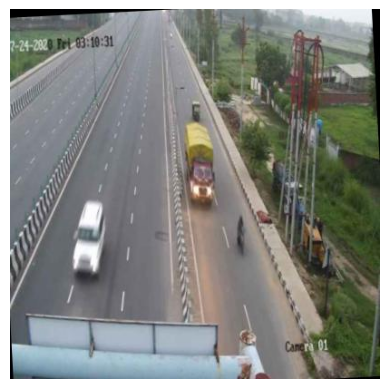

In [279]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [205]:
print(sample_label)

[[3.0000000e+00 8.4864016e+04 6.8544047e+04 1.7951977e+04 4.0799992e+04]
 [2.0000000e+00 3.5087945e+04 1.0261207e+05 2.1216004e+04 3.8759977e+04]]


In [206]:
sample_label.ndim

2

In [192]:
image.shape

(408, 408, 3)

In [194]:
# Convert bounding box coordinates to pixel values
height, width, _ = image.shape

In [195]:
height

408

In [196]:
width

408

In [197]:
_

3

In [226]:

sample_label[0][1] = sample_label[0][1]  * width  # x_min
sample_label[0][2] = sample_label[0][2] * height  # y_min
sample_label[0][3] = sample_label[0][3] * width  # width
sample_label[0][4] = sample_label[0][4] * height  # height

In [222]:

for label_info in sample_label:
    class_label = int(label_info[0])
    x_min, y_min, box_width, box_height = map(int, label_info[1:])
    x_max = x_min + box_width
    y_max = y_min + box_height
    color = (255, 255, 0)  # Green color
    thickness = 2  # Thickness of the bounding box lines
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

cv2.putText(image, f"Class {class_label}", (x_min, y_min - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



error: ignored

In [224]:
# Get the adjusted bounding box coordinates
classs =
x_min = int(sample_label[0][1])
y_min = int(sample_label[0][2])
width = int(sample_label[0][3])
height = int(sample_label[0][4])

# Calculate x_max and y_max
x_max = x_min + width
y_max = y_min + height

# Draw bounding box on the image
color = (0, 255, 0)  # Green color
thickness = 2  # Thickness of the bounding box lines
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

error: ignored

In [225]:
x_max = x_min + width
y_max = y_min + height

# Draw bounding box on the image
color = (0, 255, 0)  # Green color
thickness = 2  # Thickness of the bounding box lines

# Convert the coordinates to tuples
pt1 = (x_min, y_min)
pt2 = (x_max, y_max)

# Draw the rectangle
cv2.rectangle(image, pt1, pt2, color, thickness)

# Display the image with bounding box using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

error: ignored

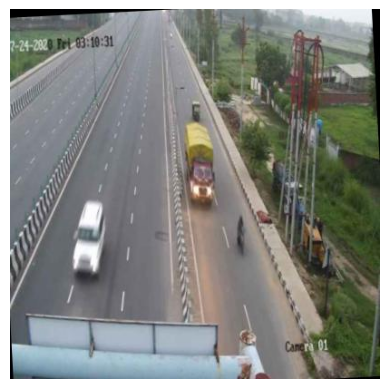

In [201]:

# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [218]:
# Iterate over each bounding box in the label
for box_info in sample_label:
    class_label, x_min, y_min, width, height = box_info
    x_max = x_min + width
    y_max = y_min + height
    color = (0, 255, 0)  # Green color
    thickness = 200  # Thickness of the bounding box lines
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
    cv2.putText(image, f"Class {int(class_label)}", (int(x_min), int(y_min) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

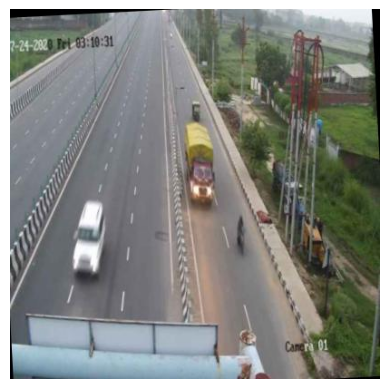

In [219]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Box info: [3.0000000e+00 3.4624520e+07 2.7965972e+07 7.3244065e+06 1.6646397e+07]
Box info: [2.0000000e+00 1.4315882e+07 4.1865724e+07 8.6561300e+06 1.5814070e+07]


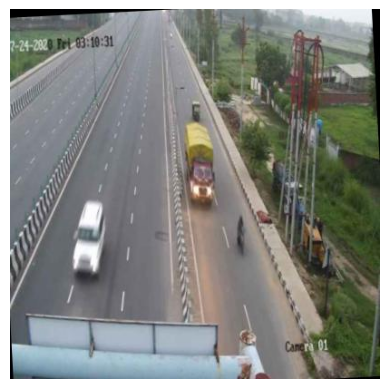

In [220]:

for box_info in sample_label:
    print("Box info:", box_info)

    # Rest of the code for drawing bounding boxes

# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [227]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2041: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


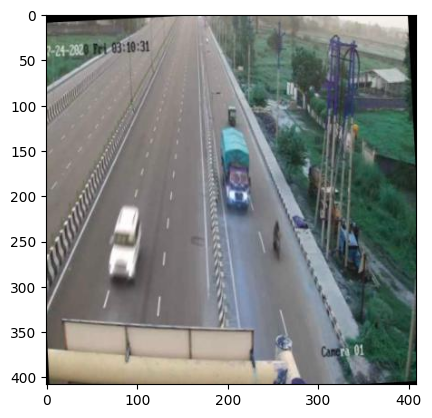

In [232]:
# Create a figure and axis
fig, ax = plt.subplots(1)

# Iterate through each label in the label data

class_idx, x_min_norm, y_min_norm, width_norm, height_norm = sample_label[0]

# Convert normalized coordinates to pixel values
x_min = x_min_norm * width
y_min = y_min_norm * height
width = width_norm * width
height = height_norm * height

# Create a rectangle patch for the bounding box
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle patch to the axis
ax.add_patch(rect)

# Show the plot with the image and bounding boxes
plt.imshow(image)

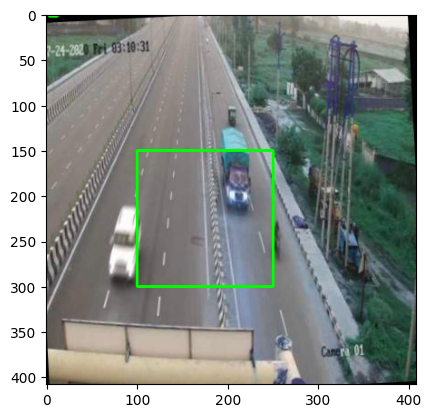

In [277]:
plt.imshow(image)

In [295]:
for label in sample_label:
    class_idx, x_min_norm, y_min_norm, width_norm, height_norm = label

    # Convert normalized coordinates to pixel values
    x_min = (np.float64(x_min_norm * 408))
    y_min = (np.float64(y_min_norm * 408))
    width = (np.float64(width_norm * 408))
    height = (np.float(height_norm * 408))

<ipython-input-295-c58b6e162246>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  height = (np.float(height_norm * 408))


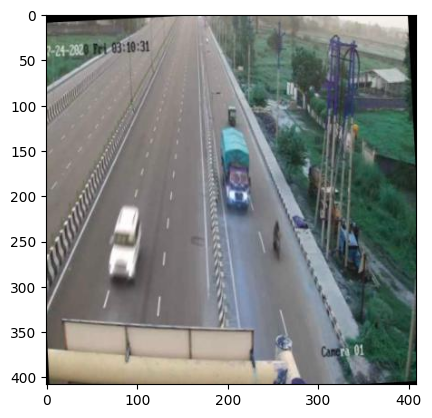

In [284]:
img = cv2.rectangle(image, (int(np.float64(3.4624520e+07)), int(np.float64(2.7965972e+07))), (int(np.float64(7.3244065e+06)), int(np.float64(1.6646397e+07))), (0, 255, 0), 2)

plt.imshow(img)

In [297]:
img = cv2.rectangle(image, (int(x_min_norm), int(y_min_norm)), (int(width),  int(height)), (0, 255, 0), 2)

plt.imshow(img)

error: ignored

In [285]:
image.shape


(408, 408, 3)